In [4]:
!pip install tensorflow-gpu==2.12

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv("/content/drive/MyDrive/SUT_AI_training/day9/ex1_simple_perceptron.csv")
df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [10]:
df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

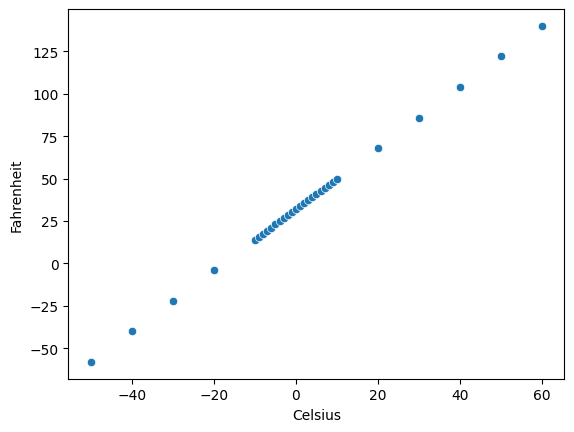

In [15]:
sns.scatterplot(data = df, x = "Celsius", y = "Fahrenheit")

In [27]:
x_train = df["Celsius"]
y_train = df["Fahrenheit"]
print(type(x_train))

<class 'pandas.core.series.Series'>


In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [22]:
epochs_hist = model.fit(x_train, y_train, epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1701.0438   
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 1206.0343
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 970.7247
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 948.5800
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1023.8915
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1070.1169
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1040.4978
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 955.8549
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 855.8688
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 773.6846
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 726.6238
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 713.6523
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 718.8245
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 721.1692
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

In [33]:
celcius = np.array([134.5, 3424.12, -234.1])
pred = model.predict(celcius)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
[[ 274.1    ]
 [6195.416  ]
 [-389.37997]]


In [35]:
def calF(Celsius):
  for c in Celsius:
    print((9/5 * c)+32)
calF(celcius)

274.1
6195.416
-389.38


In [31]:
model.get_weights()


[array([[1.8]], dtype=float32), array([32.000027], dtype=float32)]